In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../BPI2016_Clicks_Logged_In.csv", encoding_errors="ignore", on_bad_lines='skip', sep=";",
                usecols=['CustomerID', 'AgeCategory', 'Gender', 'Office_U', 'Office_W',
       'SessionID', 'IPID', 'TIMESTAMP', 'VHOST', 'URL_FILE', 'PAGE_NAME',
       'REF_URL_category', 'page_load_error', 'page_action_detail', 'tip',
       'service_detail', 'xps_info'])
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], infer_datetime_format=True)

C:\Users\krdeg\AppData\Local\Temp\ipykernel_56968\3643350991.py:6: DtypeWarning: Columns (11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../BPI2016_Clicks_Logged_In.csv", encoding_errors="ignore", on_bad_lines='skip', sep=";",


In [2]:
df = df.sort_values(by=["TIMESTAMP", "CustomerID", "SessionID"])
df.head(10)

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info
3271608,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:36:59.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0,NaN,NaN,NaN,NaN
5687809,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:37:13.210,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_cv,NaN,0,NaN,NaN,NaN,NaN
6113803,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:37:21.187,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_cv,NaN,0,NaN,NaN,NaN,NaN
6167539,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:38:42.573,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN
6167542,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:39:26.053,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN
3812070,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:41:04.587,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN
4089803,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:41:23.543,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN
4474611,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:46:24.087,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN
4563705,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:46:38.593,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0,NaN,NaN,NaN,NaN
3811098,797444,50-65,M,238,238,10125891,99546,2015-07-01 02:50:12.647,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/taken,taken,NaN,0,NaN,NaN,NaN,NaN


## Activities

In [3]:
value_count_activity = df["URL_FILE"].value_counts()

In [4]:
df_activity_freq = pd.DataFrame([value_count_activity[:10], value_count_activity[:10] / value_count_activity.sum() * 100], ).T
df_activity_freq.columns = ["Frequency", "Percentage of total"]
df_activity_freq["Cumulative"] = df_activity_freq["Percentage of total"].cumsum()
df_activity_freq.index

Index(['/werk_nl/werknemer/mijn_werkmap/doorgeven/taken',
       '/werk_nl/werknemer/mijn_werkmap/werk-zoeken/vacatures_bij_mijn_cv',
       '/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mijn_cv',
       '/werk_nl/werknemer/home',
       '/werk_nl/werknemer/mijn_werkmap/werk-zoeken/vacatures_zoeken',
       '/werk_nl/werknemer/mijn_werkmap/postvak/mijn_berichten',
       '/portal/page/portal/home/diensten/aanvragen-ww',
       '/werk_nl/werknemer/mijn_werkmap',
       '/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn_sollicitaties',
       '/werk_nl/werknemer/werkmap'],
      dtype='object')

In [5]:
value_count_activity[:10] / value_count_activity.sum() * 100

/werk_nl/werknemer/mijn_werkmap/doorgeven/taken                      25.399829
/werk_nl/werknemer/mijn_werkmap/werk-zoeken/vacatures_bij_mijn_cv    13.295844
/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mijn_cv                  12.273005
/werk_nl/werknemer/home                                               8.121691
/werk_nl/werknemer/mijn_werkmap/werk-zoeken/vacatures_zoeken          8.120270
/werk_nl/werknemer/mijn_werkmap/postvak/mijn_berichten                7.359371
/portal/page/portal/home/diensten/aanvragen-ww                        3.499168
/werk_nl/werknemer/mijn_werkmap                                       2.882145
/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn_sollicitaties          2.840834
/werk_nl/werknemer/werkmap                                            2.525556
Name: URL_FILE, dtype: float64

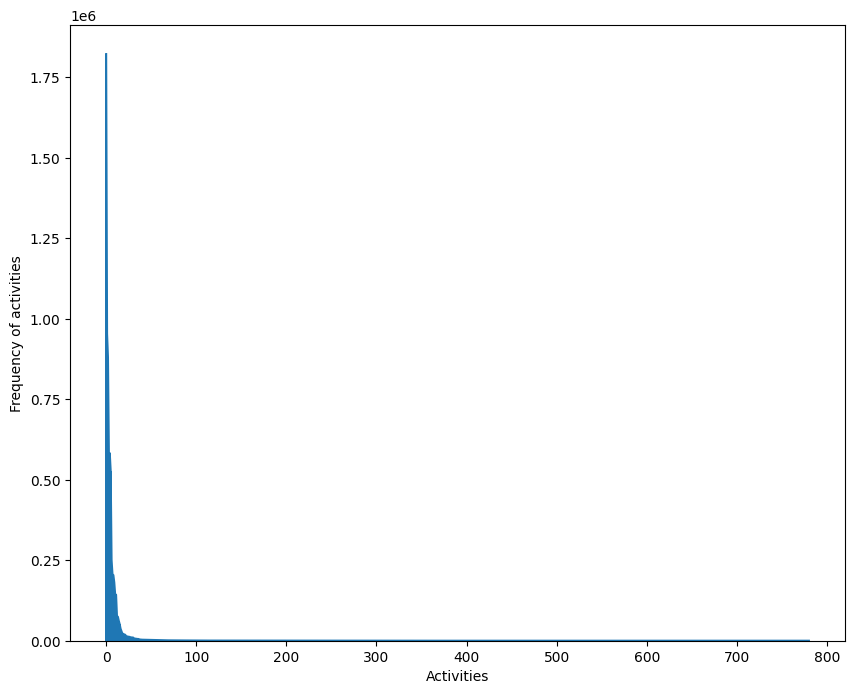

In [7]:
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar([i for i in range(781)], value_count_activity.values, width=2)
plt.plot([i for i in range(781)], value_count_activity.values)

plt.xlabel("Activities")
plt.ylabel("Frequency of activities")
plt.savefig("Distributions/distribution_activities.png")
plt.show()


In [8]:
print("Three most occurring activities are performed : ", (value_count_activity / value_count_activity.sum() * 100)[:3].sum(), "percent of the time")

Three most occurring activities are performed :  50.96867790003364 percent of the time


In [9]:
print("Twinty most occurring activities are performed : ", (value_count_activity / value_count_activity.sum() * 100)[:3].sum(), "percent of the time")

Twinty most occurring activities are performed :  50.96867790003364 percent of the time


In [10]:
print(value_count_activity[value_count_activity < 200].size, "of the activities is executed less than 200 times")

615 of the activities is executed less than 200 times


In [11]:
print(value_count_activity[value_count_activity < 10].size, "of the activities is executed less than 10 times")

357 of the activities is executed less than 10 times


In [12]:
print(value_count_activity[value_count_activity == 1].size, "of the activities is executed less than 1 times")

149 of the activities is executed less than 1 times


## Sessions

In [13]:
value_count_SessionID = df["SessionID"].value_counts()
value_count_sessionid_x_axis = [i for i in range(660270)]
value_count_SessionID

17065368    577
19521443    435
5980347     430
15858236    428
50423274    398
           ... 
39876683      1
40446129      1
40266423      1
43181378      1
54161753      1
Name: SessionID, Length: 660270, dtype: int64

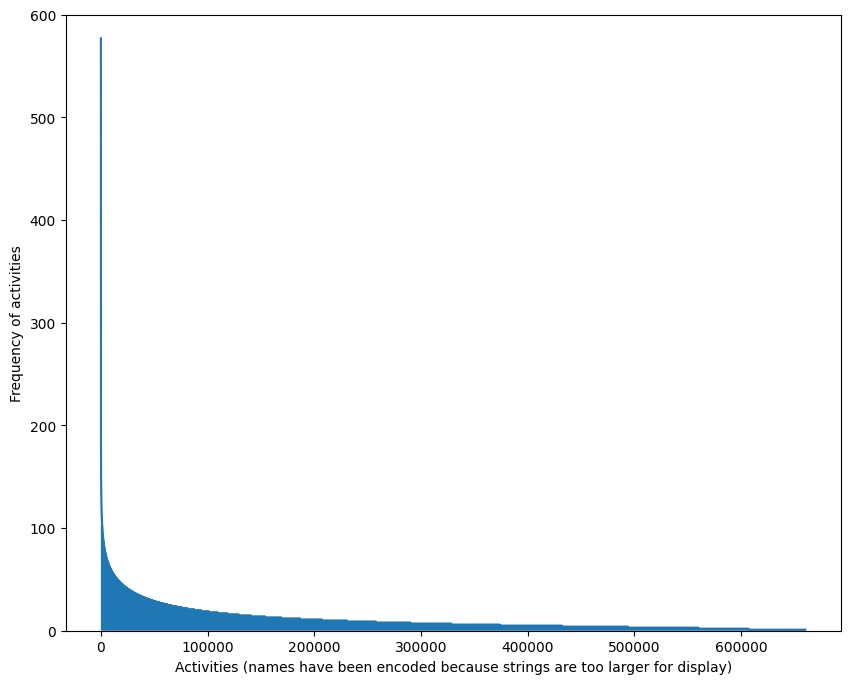

In [14]:
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
#plt.bar(value_count_sessionid_x_axis, value_count_SessionID.values, width=2)
plt.plot(value_count_sessionid_x_axis, value_count_SessionID.values)

plt.xlabel("Activities (names have been encoded because strings are too larger for display)")
plt.ylabel("Frequency of activities")
plt.fill_between(value_count_sessionid_x_axis, value_count_SessionID.values)
plt.margins(y=0)
plt.ylim(0, 600)
plt.savefig("Distributions/distribution_sessionid.png")
plt.show()


In [15]:
print(value_count_SessionID.sum() / value_count_SessionID.size, "activities on average in a session")

10.866666666666667 activities on average in a session


In [16]:
print(value_count_SessionID[value_count_SessionID == 1].size, "of the sessions include one activity")

53410 of the sessions include one activity


In [17]:
print(value_count_SessionID[value_count_SessionID < 5].size, "of the sessions include less than five activities")

228512 of the sessions include less than five activities


In [18]:
print(value_count_SessionID[value_count_SessionID < 11].size, "of the sessions include less than five activities")

453274 of the sessions include less than five activities


## Customers

In [19]:
value_count_CustomerID = df["CustomerID"].value_counts()
value_count_CustomerID

1682449    9701
2075941    8053
2076211    6466
503400     6386
975283     5073
           ... 
369509        1
2043587       1
1867570       1
1800882       1
2219021       1
Name: CustomerID, Length: 26647, dtype: int64

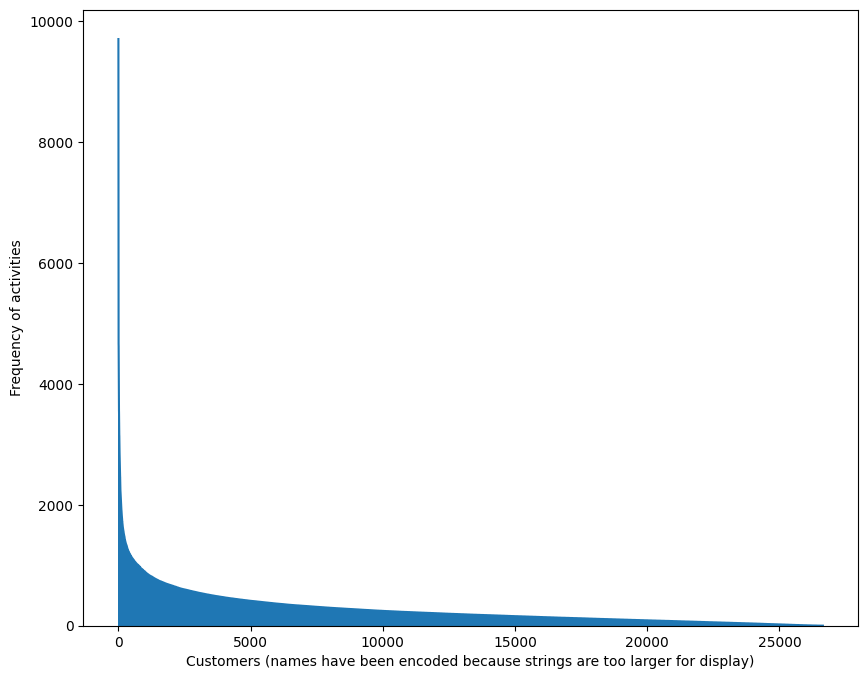

In [20]:
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar([i for i in range(26647)], value_count_CustomerID.values, width=2)
plt.plot([i for i in range(26647)], value_count_CustomerID.values)

plt.xlabel("Customers (names have been encoded because strings are too larger for display)")
plt.ylabel("Frequency of activities")
plt.savefig("Distributions/distribution_customers.png")
plt.show()


In [21]:
print(df.shape[0] / len(value_count_CustomerID), "average activities per customer")

269.25860321987466 average activities per customer


In [22]:
print(value_count_CustomerID[value_count_CustomerID == 1].size, "of the customers only execute one activity")

123 of the customers only execute one activity


In [23]:
print(value_count_CustomerID[value_count_CustomerID < 11].size, "of the customers only execute one activity")

905 of the customers only execute one activity


In [24]:
print(value_count_CustomerID[value_count_CustomerID < 270].size, "of the customers only execute one activity")

17612 of the customers only execute one activity


In [25]:
print((value_count_CustomerID / value_count_CustomerID.sum() * 100)[:266].sum(), "percent of the activities come from the 1% most active users")

8.079586516057152 percent of the activities come from the 1% most active users


## Sessions per user

In [26]:
value_count_session_per_customer_temp = df.groupby(["SessionID", "CustomerID"], as_index=False).count()

In [27]:
value_count_session_per_customer = value_count_session_per_customer_temp["CustomerID"].value_counts()

In [28]:
value_count_session_per_customer

1682449    494
1389451    450
984160     433
2036141    423
2033620    364
          ... 
1748632      1
2050978      1
1858263      1
2141057      1
2232043      1
Name: CustomerID, Length: 26647, dtype: int64

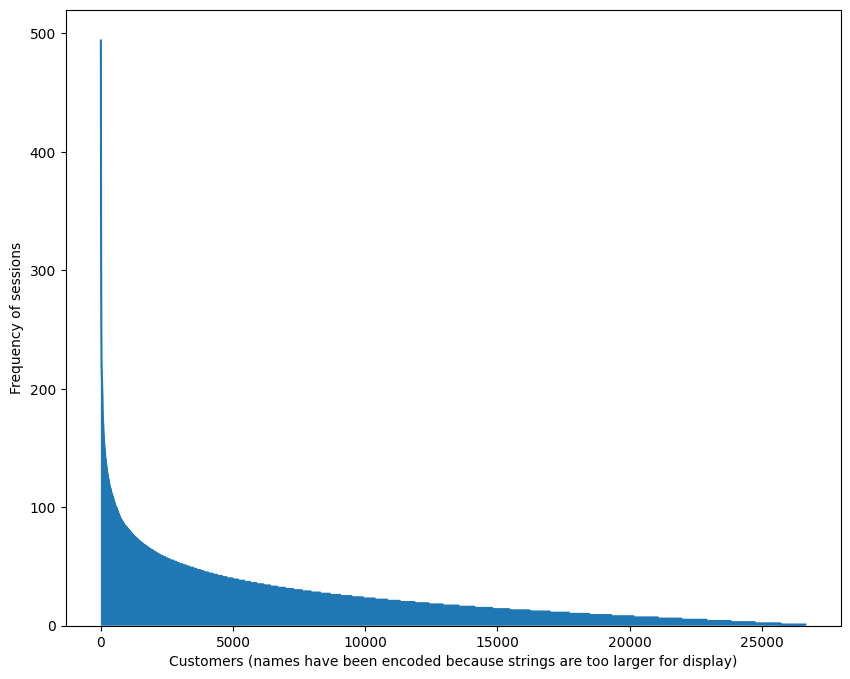

In [29]:

fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.plot([i for i in range(26647)], value_count_session_per_customer.values)


plt.fill_between([i for i in range(26647)], value_count_session_per_customer.values)
plt.margins(y=0)
plt.ylim(0,520)
plt.xlabel("Customers (names have been encoded because strings are too larger for display)")
plt.ylabel("Frequency of sessions")
plt.savefig("Distributions/distribution_sessions_per_user.png")
plt.show()


In [30]:
print(value_count_session_per_customer.sum() / value_count_session_per_customer.size, "average sessions per users")

24.791308590085187 average sessions per users


In [31]:
print(value_count_session_per_customer[value_count_session_per_customer == 1].size, "users only perform one session")

942 users only perform one session


In [32]:
print(value_count_session_per_customer[value_count_session_per_customer < 10].size, "users only perform one session")

8185 users only perform one session


In [33]:
print(value_count_session_per_customer[value_count_session_per_customer < 25].size, "users only perform one session")

17170 users only perform one session


In [34]:
print((value_count_session_per_customer / value_count_session_per_customer.sum() * 100)[:266].sum(), "percent of all the sessions come from the 1% most active users")

6.859527651548408 percent of all the sessions come from the 1% most active users


In [42]:
def concat_and_filter(df_raw, file_name, amount_real, amount_anomalies):

    df_gen_anomalies = pd.read_csv(file_name)
    df_gen_anomalies["Label"] = "potential_anomaly"
    df_raw_filtered = df_raw[df_raw["SessionID"].isin(df_raw["SessionID"].unique()[:amount_real])]
    df_gen_anomalies_filtered = df_gen_anomalies[df_gen_anomalies["SessionID"].isin(df_gen_anomalies["SessionID"].unique()[:amount_anomalies])]

    df = pd.concat([df_raw_filtered, df_gen_anomalies_filtered])
    return df

In [45]:
var_2_amount_real = 1000000000000
var_2_amount_generated = 2000

url = 'generated_data/Pattern_3/generated_anomalies_plus_25_2k.csv'
df_concat = concat_and_filter(df, url, amount_real = var_2_amount_real, amount_anomalies=var_2_amount_generated)

In [46]:
df_concat

,CustomerID,AgeCategory,Gender,Office_U,Office_W,SessionID,IPID,TIMESTAMP,VHOST,URL_FILE,PAGE_NAME,REF_URL_category,page_load_error,page_action_detail,tip,service_detail,xps_info,Unnamed: 0,Label
3271608,797444.0,50-65,M,238.0,238.0,10125891,99546.0,2015-07-01 02:36:59.713,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/postvak/mijn_b...,mijn_berichten,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5687809,797444.0,50-65,M,238.0,238.0,10125891,99546.0,2015-07-01 02:37:13.210,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_cv,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6113803,797444.0,50-65,M,238.0,238.0,10125891,99546.0,2015-07-01 02:37:21.187,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/werk-zoeken/mi...,mijn_cv,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6167539,797444.0,50-65,M,238.0,238.0,10125891,99546.0,2015-07-01 02:38:42.573,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6167542,797444.0,50-65,M,238.0,238.0,10125891,99546.0,2015-07-01 02:39:26.053,digid.werk.nl,/werk_nl/werknemer/mijn_werkmap/doorgeven/mijn...,mijn_sollicitaties,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180374,NaN,NaN,NaN,NaN,NaN,generated_plus_25_1999,NaN,NaT,NaN,/werk_nl/werknemer/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180374.0,potential_anomaly
180375,NaN,NaN,NaN,NaN,NaN,generated_plus_25_1999,NaN,NaT,NaN,/portal/page/portal/home/diensten/aanvragen-ww,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180375.0,potential_anomaly
180376,NaN,NaN,NaN,NaN,NaN,generated_plus_25_1999,NaN,NaT,NaN,/werk_nl/werknemer/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180376.0,potential_anomaly
180377,NaN,NaN,NaN,NaN,NaN,generated_plus_25_1999,NaN,NaT,NaN,/portal/page/portal/home/diensten/aanvragen-ww,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180377.0,potential_anomaly


In [47]:
#Calculate how many times each activity is repeated
df_for_gby = df.sort_values(["SessionID", "TIMESTAMP"])[["SessionID", "URL_FILE"]]

df_for_gby["consecutive"] = df_for_gby.groupby("SessionID")["URL_FILE"].shift(periods=-1)
df_for_gby["Count_ww"] = (df_for_gby["URL_FILE"] == "/portal/page/portal/home/diensten/aanvragen-ww").astype(int)
df_for_gby['consecutive_agg'] = df_for_gby.Count_ww.groupby((df_for_gby.Count_ww != df_for_gby.Count_ww.shift()).cumsum()).transform('size') * df_for_gby.Count_ww

#Get all the repetitions
empty_list = []

for row in df_for_gby.values:
    if row[-1] == 0:
        je_mag_opslaan = True
    if je_mag_opslaan == True and row[-1] > 0:
        empty_list.append([row[0], row[1], row[-1]])
        je_mag_opslaan = False

repetition_df = pd.DataFrame(empty_list, columns=["SessionID", "URL_FILE", "Rep_count"])


df_aanvragen_rep_in_session = repetition_df[repetition_df["URL_FILE"] == "/portal/page/portal/home/diensten/aanvragen-ww"].groupby("SessionID").count()

count_rep_pattern = df_aanvragen_rep_in_session["Rep_count"].value_counts()

x_1 = count_rep_pattern.index
y_1 = count_rep_pattern.values

In [ ]:
#Calculate how many times each activity is repeated
df_for_gby = df_concat.sort_values(["SessionID", "TIMESTAMP"])[["SessionID", "URL_FILE"]]

df_for_gby["consecutive"] = df_for_gby.groupby("SessionID")["URL_FILE"].shift(periods=-1)
df_for_gby["Count_ww"] = (df_for_gby["URL_FILE"] == "/portal/page/portal/home/diensten/aanvragen-ww").astype(int)
df_for_gby['consecutive_agg'] = df_for_gby.Count_ww.groupby((df_for_gby.Count_ww != df_for_gby.Count_ww.shift()).cumsum()).transform('size') * df_for_gby.Count_ww

#Get all the repetitions
empty_list = []

for row in df_for_gby.values:
    if row[-1] == 0:
        je_mag_opslaan = True
    if je_mag_opslaan == True and row[-1] > 0:
        empty_list.append([row[0], row[1], row[-1]])
        je_mag_opslaan = False

repetition_df = pd.DataFrame(empty_list, columns=["SessionID", "URL_FILE", "Rep_count"])


df_aanvragen_rep_in_session = repetition_df[repetition_df["URL_FILE"] == "/portal/page/portal/home/diensten/aanvragen-ww"].groupby("SessionID").count()

count_rep_pattern = df_aanvragen_rep_in_session["Rep_count"].value_counts()

x_2 = count_rep_pattern.index
y_2 = count_rep_pattern.values

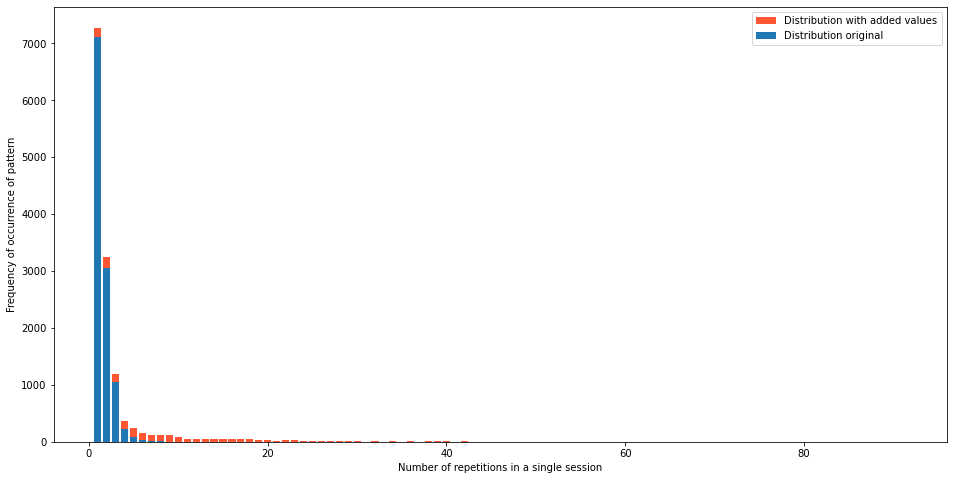

In [ ]:
plt.figure(figsize=(16, 8))
plt.bar(x_2, y_2, label="Distribution with added values", color="#FF5733")
plt.bar(x_1, y_1, label="Distribution original")
plt.legend()
plt.ylabel('Frequency of occurrence of pattern')
plt.xlabel('Number of repetitions in a single session')
plt.savefig("advanced_repetition_added_anomalies.png")